# Modelo Regresión Logística

In [ ]:
#Importamos Librerias, funciones y metricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import RobustScaler

# Analisis de datos

In [220]:
# Cargamos el dataset
data= pd.read_csv('heart_cleveland_upload')

## Columnas y Tipos de Datos

In [222]:
# Verificamos columnas y tipos de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [224]:
#Observamos algunos datos
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


## Valores Nulos

In [226]:
#Verificamos Datos Nulos
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## Valores Atípicos

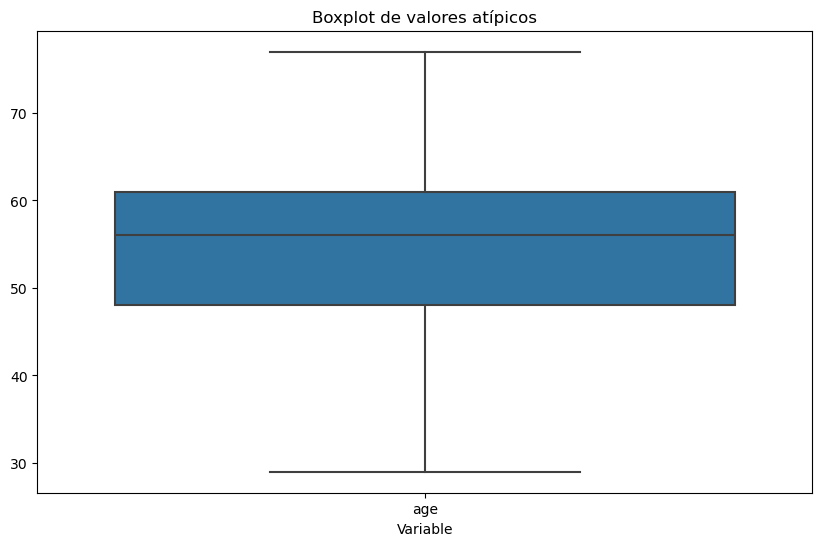

In [228]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :1])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

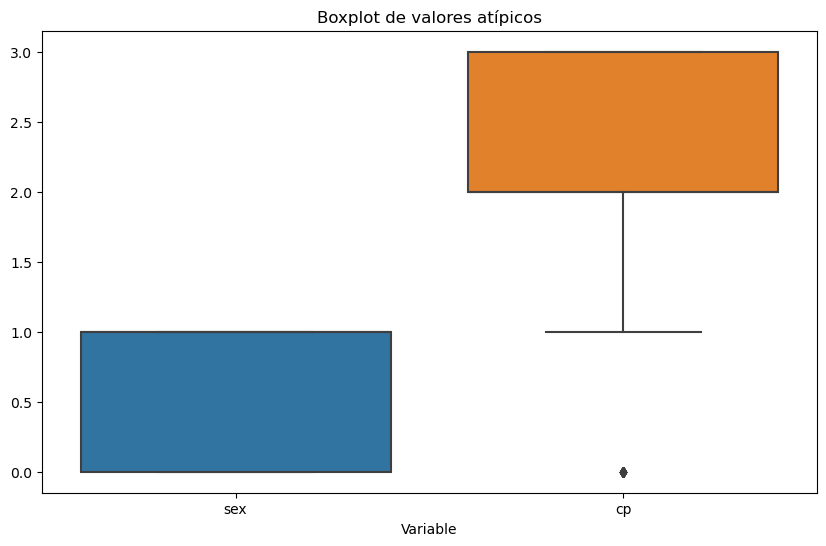

In [230]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 1:3])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

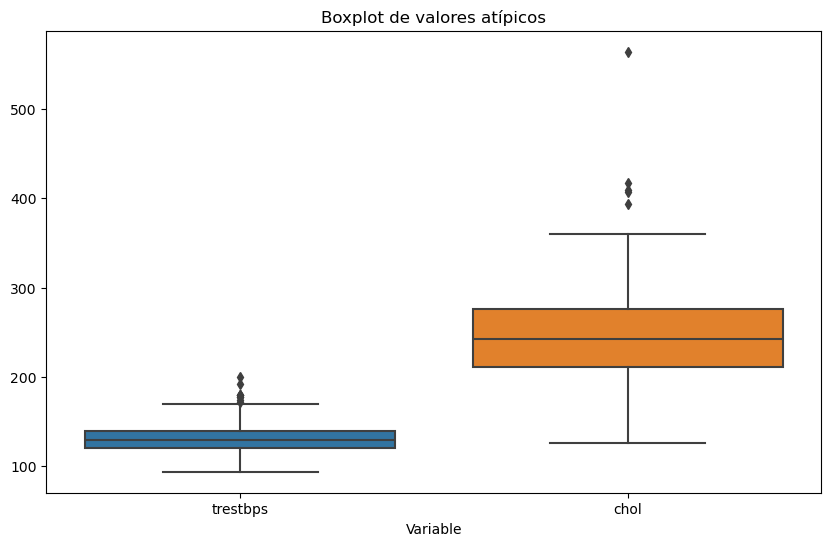

In [232]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 3:5])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

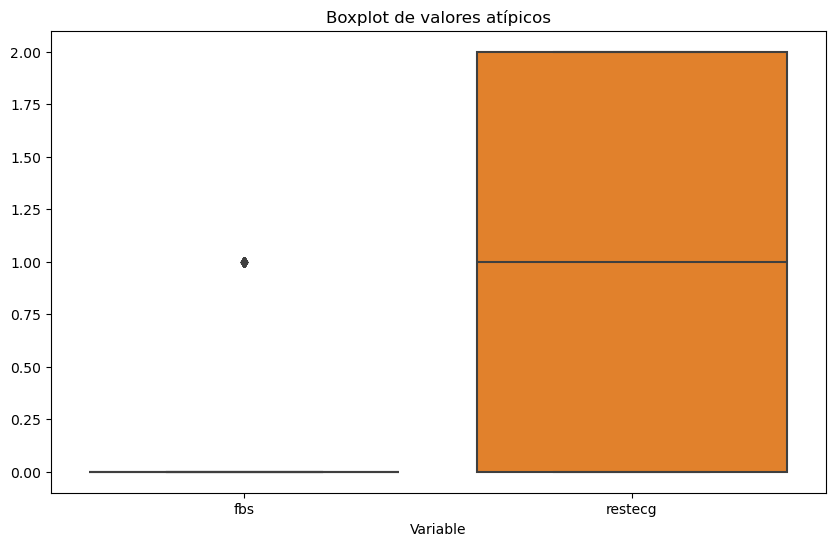

In [234]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 5:7])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

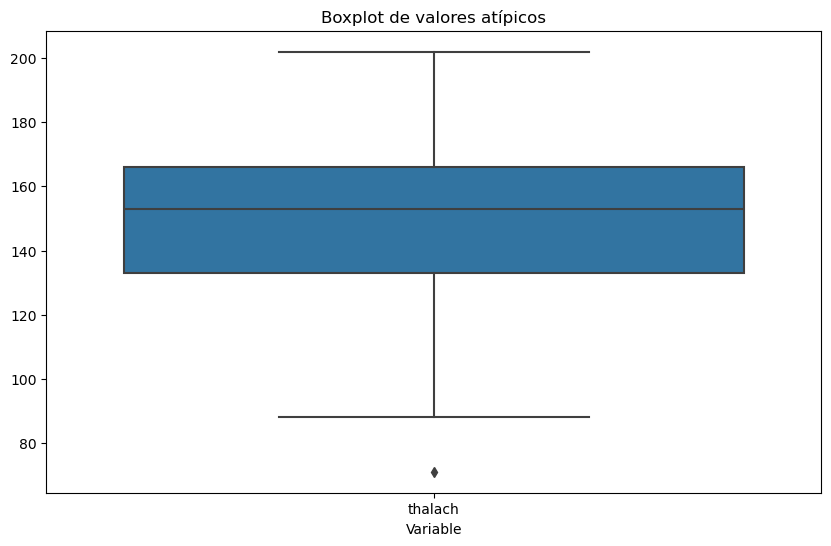

In [236]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 7:8])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

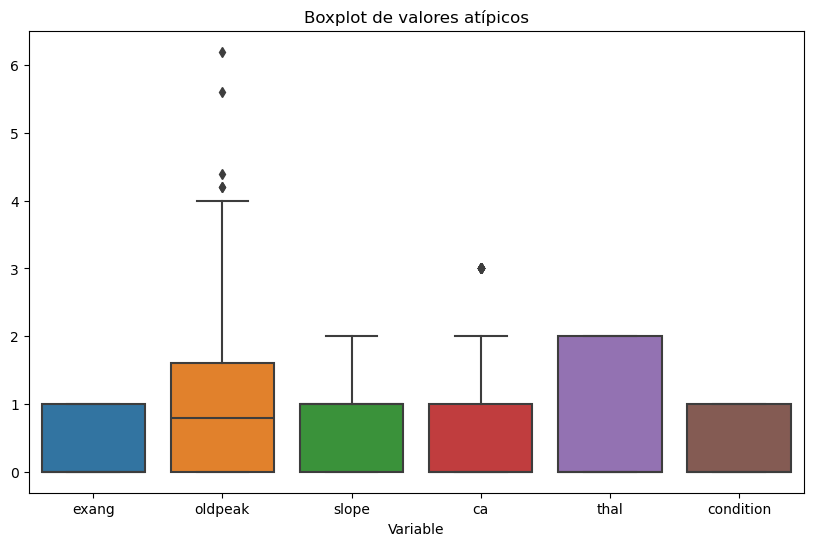

In [238]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 8:14])
plt.title('Boxplot de valores atípicos')
plt.xlabel('Variable')
plt.show()

## Tratar Valores Atípicos

In [240]:
# Llenamos valores atipicos con la media
for column in data.columns:
    mean = data[column].mean()
    #moda = data[column].mode()[0]

    std_dev = data[column].std()

    # Calcular z-scores
    z_score= (data[column] - mean) / std_dev

    # Identificar valores atípicos
    threshold = 2
    outliers = data[(z_score > threshold) | (z_score < -threshold)].index

    # Imputar valores atípicos con la media
    for index in outliers:
        data.loc[index, column] = round(mean)

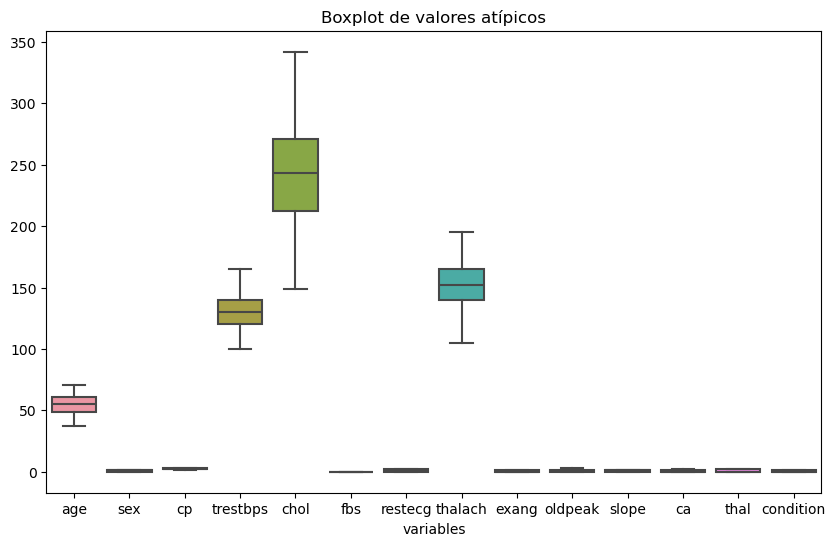

In [242]:
#Verificamos nuevamente valores atipicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot de valores atípicos')
plt.xlabel('variables')
plt.show()

In [244]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## Seleccionar Mejores Características

In [246]:
# Seleccionamos mejores variables
x= data.drop(columns=['condition'])
y= data['condition']

selector= SelectKBest(score_func=f_classif, k=5)
x_new= selector.fit_transform(x, y)

mask= selector.get_support()
selected_features= x.columns[mask]

print("Caracteristicas seleccionadas")
print(selected_features)

Caracteristicas seleccionadas
Index(['cp', 'thalach', 'exang', 'ca', 'thal'], dtype='object')


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## División del Dataset

In [248]:
# Dividimos el dataset en train y test
x_train, x_test, y_train, y_test= train_test_split(x_new, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento: ", x_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba: ", x_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento:  (237, 5) (237,)
Tamaño del conjunto de prueba:  (60, 5) (60,)


In [250]:
# Escalamos las variables para un mejor ajuste
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## Crear Modelo

In [252]:
# Creamos el modelo de Regresion Lineal
model= LogisticRegression()

param_grid= {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'] 
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros: ", grid_search.best_params_)

Mejores hiperparámetros:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


## Evaluar Modelo con Metricas

In [254]:
# Evaluamos el modelo con las metricas
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
report = classification_report(y_test, y_pred)

# Observamos los resultados de las metricas
print(f"Precisión del modelo: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(report)

Precisión del modelo: 0.8333333333333334
ROC AUC: 0.8699776785714285
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



## Analisis De Resultados

### 1. Precisión del modelo (Accuracy)

#### Valor: 0.83 (o 83%)
#### Interpretación: 
Este porcentaje indica que el modelo clasifica correctamente el 83% de las instancias en el conjunto de datos. Aunque es un buen resultado, siempre es importante tener en cuenta la distribución de las clases, ya que un modelo puede tener alta precisión pero fallar en una clase si hay un desbalance significativo.

### 2. ROC AUC

#### Valor: 0.87 (o 87%)
#### Interpretación: 
Esta métrica indica la capacidad del modelo para discriminar entre las dos clases. Un valor de 0.87 sugiere que el modelo tiene un buen rendimiento en la clasificación, siendo capaz de distinguir entre las clases positivas y negativas de manera efectiva. Un AUC de 0.5 indica un rendimiento aleatorio, mientras que 1.0 indica un modelo perfecto.

### 3. Métricas por clase

#### Clase 0:
####    Precisión: 0.84 (84%)
        Proporción de verdaderos positivos sobre el total de predicciones positivas para la clase 0.
####    Recall: 0.84 (84%)
        Proporción de verdaderos positivos sobre el total de instancias reales positivas para la clase 0.
####    F1-score: 0.84 (84%)
        Promedio ponderado de precisión y recall, indicando un buen equilibrio entre ambas métricas.

#### Clase 1:
####    Precisión: 0.82 (82%)
        Proporción de verdaderos positivos sobre el total de predicciones positivas para la clase 1.
####    Recall: 0.82 (82%)
        Proporción de verdaderos positivos sobre el total de instancias reales positivas para la clase 1.
####    F1-score: 0.82 (82%)
        Indica un buen balance entre precisión y recall, similar a la clase 0.

### 4. Promedios

#### Macro promedio:
Todas las métricas (precisión, recall, y F1) son promediadas sin tener en cuenta el soporte. Esto proporciona una visión           general del rendimiento del modelo.
#### Weighted promedio:
Estas métricas se ponderan según el soporte (número de instancias por clase), lo que da más peso a las clases con más              instancias. Esto es útil para entender cómo se comporta el modelo en función de la cantidad de datos que tiene.
